In [77]:
# Import required libraries
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

In [78]:
personality_test_df = pd.read_csv('../Downloads/Big_Five_Personality_Test/data-final.csv', sep='\t')

In [79]:
personality_test_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [80]:
personality_test_df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [81]:
personality_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [82]:
personality_test_df.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [83]:
# Drop rows with missing values
personality_test_df = personality_test_df.dropna()
personality_test_df.isnull().sum().sum()

0

In [84]:
# Display number of entries and dtypes
personality_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012050 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 857.1+ MB


In [85]:
# display the columns with object data type
personality_test_df.select_dtypes(include=['object']).columns

Index(['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], dtype='object')

In [86]:
# View the 'object' columns
personality_test_df[['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']]

,dateload,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2016-03-03 02:01:01,GB,51.5448,0.1991
1,2016-03-03 02:01:20,MY,3.1698,101.706
2,2016-03-03 02:01:56,GB,54.9119,-1.3833
3,2016-03-03 02:02:02,GB,51.75,-1.25
4,2016-03-03 02:02:57,KE,1.0,38.0
...,...,...,...,...
1015336,2018-11-08 12:04:58,US,39.9883,-75.2208
1015337,2018-11-08 12:07:18,US,38.0,-97.0
1015338,2018-11-08 12:07:49,US,36.1473,-86.777
1015339,2018-11-08 12:08:34,US,34.1067,-117.8067


In [87]:
# Drop the dateload, lat_appx_lots_of_err, and long_appx_lots_of_err columns
personality_test_df = personality_test_df.drop(['dateload','lat_appx_lots_of_err', 'long_appx_lots_of_err'], axis=1)

In [88]:
# Convert the country column values to category codes
personality_test_df['country'] = personality_test_df['country'].astype('category').cat.codes

# Check dtypes and null values
print(personality_test_df.dtypes.value_counts())
personality_test_df.isnull().sum().sum()

float64    104
int64        2
int16        1
Name: count, dtype: int64


0

In [89]:
# Scale the data
personality_scaled = StandardScaler().fit_transform(personality_test_df)
personality_scaled

array([[ 1.06930354, -1.33932583,  1.40879181, ..., -0.00181757,
        -0.2368805 , -1.17103981],
       [ 0.27846179,  1.68186475, -0.23718738, ..., -0.00181421,
        -0.2368805 , -0.12456867],
       [-0.51237997,  0.17126946,  0.58580222, ..., -0.0018169 ,
        -0.2368805 , -1.17103981],
       ...,
       [ 1.06930354, -0.58402818,  0.58580222, ..., -0.00181354,
        -0.11124691,  0.76842005],
       [-0.51237997,  0.9265671 , -0.23718738, ..., -0.00181623,
        -0.2368805 ,  0.76842005],
       [ 1.06930354, -0.58402818,  0.58580222, ..., -0.00181555,
        -0.2368805 ,  0.76842005]])

In [90]:
# Create a DataFrame with the scaled data
transformed_columns = list(personality_test_df.columns)
personality_scaled_df = pd.DataFrame(personality_scaled, columns=transformed_columns)
personality_scaled_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,country
0,1.069304,-1.339326,1.408792,-0.921798,1.348737,-1.143013,1.591371,-1.112304,0.769836,-1.958685,...,-0.008775,-0.007733,-0.002231,-0.680887,1.097351,-0.018621,-0.021698,-0.001818,-0.236880,-1.171040
1,0.278462,1.681865,-0.237187,0.694401,-0.216655,0.488559,-0.550954,1.246273,-1.458903,1.105867,...,-0.007795,-0.007491,-0.005257,0.376066,-0.323065,-0.018562,-0.024424,-0.001814,-0.236880,-0.124569
2,-0.512380,0.171269,0.585802,0.694401,-0.216655,-0.327227,-1.265062,-0.326112,-0.715990,1.105867,...,0.003305,-0.011004,-0.006368,0.386778,-0.323065,-0.018738,-0.024077,-0.001817,-0.236880,-1.171040
3,-0.512380,-0.584028,-1.060177,-0.113698,0.566041,-0.327227,-0.550954,0.460081,-1.458903,0.339729,...,-0.004686,-0.006598,-0.004718,1.375886,2.073887,-0.015155,-0.022441,-0.001817,-0.236880,-1.171040
4,0.278462,0.171269,-0.237187,-0.113698,1.348737,0.488559,0.163154,1.246273,0.026923,0.339729,...,-0.000400,0.011818,0.007489,0.386778,-0.323065,-0.018641,-0.017682,-0.001810,-0.211754,-0.696640


<Axes: title={'center': 'Elbow curve'}, xlabel='k'>

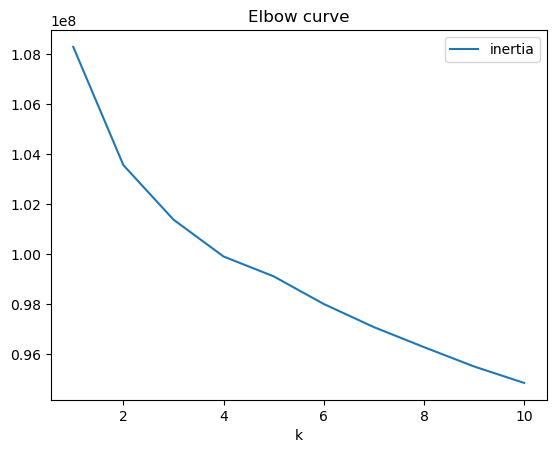

In [102]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(personality_scaled_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.plot.line(x="k", y="inertia", title="Elbow curve")

In [103]:
# Create the PCA model instance where n_components=4
pca = PCA(n_components=4)

In [104]:
# Fit the personality_scaled_df to the PCA model
personality_pca_data = pca.fit_transform(personality_scaled_df)

# Review the first five rows
personality_pca_data[:5]

array([[-4.26071629, -0.13170738,  1.95793294, -1.5923465 ],
       [ 0.42831738,  1.34829998, -2.34049443,  2.10052776],
       [-0.53349247,  1.33496179, -1.12067126,  0.24663922],
       [ 0.90043764,  0.36173411,  1.36967695, -0.8407415 ],
       [-4.05387485,  0.93382575, -4.26046887, -0.95375006]])

In [105]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.06733946, 0.04688336, 0.03718871, 0.03278344])

In [106]:
# Create a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
personality_pca_df = pd.DataFrame(personality_pca_data, columns=pca_columns)

# Display the first five rows
personality_pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-4.260716,-0.131707,1.957933,-1.592347
1,0.428317,1.348300,-2.340494,2.100528
2,-0.533492,1.334962,-1.120671,0.246639
3,0.900438,0.361734,1.369677,-0.840742
4,-4.053875,0.933826,-4.260469,-0.953750


In [107]:
# Initialize the KMeans model with n_clusters=4
model = KMeans(n_clusters=4, random_state=1)

# Fit the model for the personality_pca_df
model.fit(personality_pca_df)

# Predict the model segments (clusters)
personality_clusters = model.predict(personality_pca_df)

In [128]:
# Create a copy of the personality_pca_df DataFrame
personality_pca_predictions_df = personality_pca_df.copy()

# Create a new column in the DataFrame with the predicted clusters
personality_pca_predictions_df['Personality_Cluster'] = personality_clusters+1

# Review the DataFrame
personality_pca_predictions_df.head()

,PCA1,PCA2,PCA3,PCA4,Personality_Cluster
0,-4.260716,-0.131707,1.957933,-1.592347,4
1,0.428317,1.348300,-2.340494,2.100528,3
2,-0.533492,1.334962,-1.120671,0.246639,4
3,0.900438,0.361734,1.369677,-0.840742,1
4,-4.053875,0.933826,-4.260469,-0.953750,4


<Axes: title={'center': 'PCA KMeans Clusters'}, xlabel='PCA1', ylabel='PCA2'>

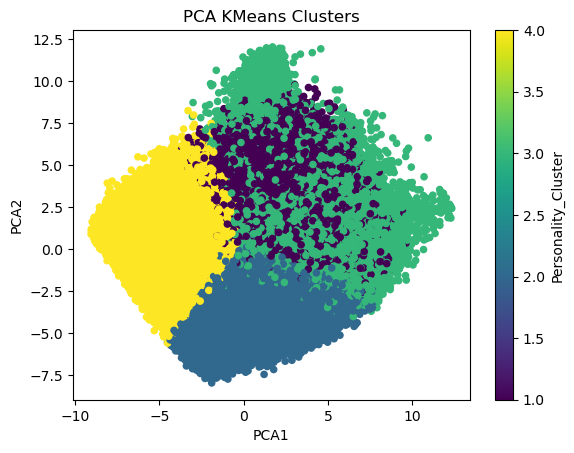

In [129]:
# Create the scatter plot with x='PCA1' and y='PCA2' and color='Personality_Cluster'
personality_pca_predictions_df.plot.scatter(x='PCA1', y='PCA2', c='Personality_Cluster', colormap='viridis', title='PCA KMeans Clusters')

In [130]:
# Find the pca component weights
pca_weights = pd.DataFrame(pca.components_.T, columns=pca_columns, index=personality_scaled_df.columns)
print(f"{pca_weights['PCA1'].sort_values(ascending=False).head(4)}")
print(f"{pca_weights['PCA2'].sort_values(ascending=False).head(4)}")
print(f"{pca_weights['PCA3'].sort_values(ascending=False).head(4)}")
print(f"{pca_weights['PCA4'].sort_values(ascending=False).head(4)}")

EXT4     0.215827
EXT10    0.212789
EXT6     0.200970
EXT2     0.197076
Name: PCA1, dtype: float64
AGR5    0.136519
EST2    0.134675
AGR7    0.122652
EST4    0.109113
Name: PCA2, dtype: float64
CSN6    0.199530
CSN2    0.184267
CSN4    0.178740
EXT1    0.175589
Name: PCA3, dtype: float64
OPN2    0.276005
OPN4    0.229998
OPN6    0.214658
AGR6    0.168613
Name: PCA4, dtype: float64


In [132]:
print(pca_weights['PCA1'].sort_values(ascending=True).head(4))
print(pca_weights['PCA2'].sort_values(ascending=True).head(4))
print(pca_weights['PCA3'].sort_values(ascending=True).head(4))
print(pca_weights['PCA4'].sort_values(ascending=True).head(4))

EXT3   -0.256135
EXT5   -0.240022
EXT7   -0.226757
EXT1   -0.199629
Name: PCA1, dtype: float64
EST7   -0.265775
EST8   -0.263932
EST6   -0.255234
EST3   -0.250062
Name: PCA2, dtype: float64
CSN7   -0.262268
CSN1   -0.254516
CSN9   -0.245993
CSN3   -0.242786
Name: PCA3, dtype: float64
OPN8    -0.314814
OPN10   -0.304321
OPN1    -0.303405
OPN5    -0.274889
Name: PCA4, dtype: float64


In [126]:
# Initialize KMeans model with n_clusters=4
model = KMeans(n_clusters=4, random_state=1)

# Fit the model for the personality_scaled_df
model.fit(personality_scaled_df)

# Create a copy of the personality_scaled_df DataFrame
personality_predictions_df = personality_scaled_df.copy()

# Create a new column in the DataFrame with the predicted clusters
personality_predictions_df['Personality_Cluster'] = model.predict(personality_predictions_df)

# Review the DataFrame
personality_predictions_df.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,Personality_Cluster
0,1.069304,-1.339326,1.408792,-0.921798,1.348737,-1.143013,1.591371,-1.112304,0.769836,-1.958685,...,-0.007733,-0.002231,-0.680887,1.097351,-0.018621,-0.021698,-0.001818,-0.236880,-1.171040,0
1,0.278462,1.681865,-0.237187,0.694401,-0.216655,0.488559,-0.550954,1.246273,-1.458903,1.105867,...,-0.007491,-0.005257,0.376066,-0.323065,-0.018562,-0.024424,-0.001814,-0.236880,-0.124569,1
2,-0.512380,0.171269,0.585802,0.694401,-0.216655,-0.327227,-1.265062,-0.326112,-0.715990,1.105867,...,-0.011004,-0.006368,0.386778,-0.323065,-0.018738,-0.024077,-0.001817,-0.236880,-1.171040,0
3,-0.512380,-0.584028,-1.060177,-0.113698,0.566041,-0.327227,-0.550954,0.460081,-1.458903,0.339729,...,-0.006598,-0.004718,1.375886,2.073887,-0.015155,-0.022441,-0.001817,-0.236880,-1.171040,3
4,0.278462,0.171269,-0.237187,-0.113698,1.348737,0.488559,0.163154,1.246273,0.026923,0.339729,...,0.011818,0.007489,0.386778,-0.323065,-0.018641,-0.017682,-0.001810,-0.211754,-0.696640,0


<Axes: title={'center': 'KMeans Clusters'}, xlabel='EXT4', ylabel='EXT10'>

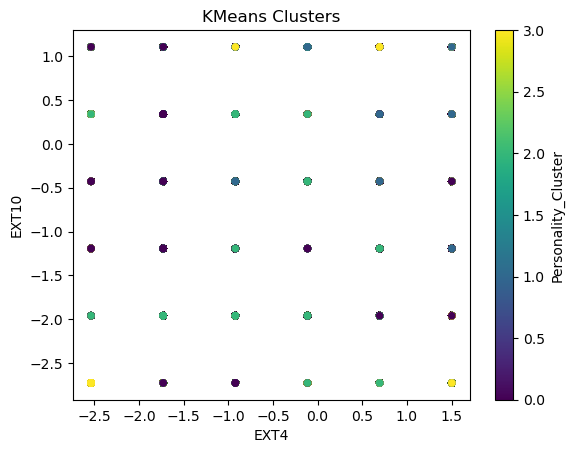

In [127]:
# Create the scatter plot with x='EXT4' and y='EXT10' and color='Personality_Cluster'
personality_predictions_df.plot.scatter(x='EXT4', y='EXT10', c='Personality_Cluster', colormap='viridis', title='KMeans Clusters')